In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ninzaami_loan_predication_path = kagglehub.dataset_download('ninzaami/loan-predication')
burak3ergun_loan_data_set_path = kagglehub.dataset_download('burak3ergun/loan-data-set')
sajidvali_loan_prediction_path = kagglehub.dataset_download('sajidvali/loan-prediction')
altruistdelhite04_loan_prediction_problem_dataset_path = kagglehub.dataset_download('altruistdelhite04/loan-prediction-problem-dataset')
prakharrathi25_loan_prediction_data_path = kagglehub.dataset_download('prakharrathi25/loan-prediction-data')
shaijudatascience_loan_prediction_practice_av_competition_path = kagglehub.dataset_download('shaijudatascience/loan-prediction-practice-av-competition')
vikasukani_loan_eligible_dataset_path = kagglehub.dataset_download('vikasukani/loan-eligible-dataset')
devzohaib_eligibility_prediction_for_loan_path = kagglehub.dataset_download('devzohaib/eligibility-prediction-for-loan')
krishnaraj30_finance_loan_approval_prediction_data_path = kagglehub.dataset_download('krishnaraj30/finance-loan-approval-prediction-data')
yash9439_loan_prediction_path = kagglehub.dataset_download('yash9439/loan-prediction')

print('Data source import complete.')

100%|██████████| 7.83k/7.83k [00:00<00:00, 1.79MB/s]

Extracting files...


100%|██████████| 7.80k/7.80k [00:00<00:00, 13.5MB/s]

Extracting files...


100%|██████████| 216k/216k [00:00<00:00, 35.1MB/s]

Extracting files...


100%|██████████| 12.6k/12.6k [00:00<00:00, 19.2MB/s]

Extracting files...


100%|██████████| 12.5k/12.5k [00:00<00:00, 4.20MB/s]

Extracting files...


100%|██████████| 12.7k/12.7k [00:00<00:00, 6.54MB/s]

Extracting files...


100%|██████████| 12.5k/12.5k [00:00<00:00, 18.7MB/s]

Extracting files...


100%|██████████| 7.80k/7.80k [00:00<00:00, 10.4MB/s]

Extracting files...


100%|██████████| 12.5k/12.5k [00:00<00:00, 9.74MB/s]

Extracting files...


100%|██████████| 12.5k/12.5k [00:00<00:00, 3.85MB/s]

Extracting files...
Data source import complete.


In [2]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from termcolor import colored

warnings.filterwarnings('ignore')

print(colored("THE REQUIRED LIBRARIES WERE SUCCESSFULLY IMPORTED...", "green", attrs=['reverse']))

THE REQUIRED LIBRARIES WERE SUCCESSFULLY IMPORTED...


In [3]:
krishnaraj30_finance_loan_approval_prediction_data_path

'/root/.cache/kagglehub/datasets/krishnaraj30/finance-loan-approval-prediction-data/versions/1'

# <font color="#4863A0"> Load The Dataset🔃 </font>
This comment indicates that we are loading the **"Finance Loan approval Prediction Data"** dataset into our program. The dataset will be stored in a pandas DataFrame called **"loan_data"**.

In [4]:
file_path = r'/kaggle/input/finance-loan-approval-prediction-data/train.csv'
file_path = krishnaraj30_finance_loan_approval_prediction_data_path + '/train.csv'

try:
    loan_data = pd.read_csv(file_path)

    print(colored("THE DATASET LOADED SUCCESSFULLY...", "green", attrs=['reverse']))

except FileNotFoundError:
    print(colored("ERROR: File not found!", "red", attrs=['reverse']))

except Exception as e:
    print(colored(f"ERROR: {e}", "red", attrs=['reverse']))

THE DATASET LOADED SUCCESSFULLY...


# <font color="#4863A0"> Dataset Information </font>

Welcome to the Loan Prediction Dataset. This dataset provides insights into loan applications, inclusive **614** records and **13** attributes.

| No. | Attribute          | Description                               | Data type        |
|:---:|:-------------------|:------------------------------------------|:-----------------|
|  1  | LoanID             | 🆔 Unique Loan ID                         | Categorical      |
|  2  | Gender             | 👫 Gender (Male/Female)                   | Categorical      |
|  3  | Married            | 💍 Married (Y/N)                          | Categorical      |
|  4  | Dependents         | 👨‍👩‍👧‍👦 Dependents                              | Categorical      |
|  5  | Education          | 🎓 Education (Graduate/Undergraduate)     | Categorical      |
|  6  | SelfEmployed       | 💼 Self-employed (Y/N)                    | Categorical      |
|  7  | ApplicantIncome    | 💰 Applicant's Income                     | Numeric/Integer  |
|  8  | CoapplicantIncome  | 💵 Coapplicant's Income                   | Numeric/float    |
|  9  | LoanAmount         | 💸 Loan Amount (in thousands)             | Numeric/float    |
| 10  | LoanAmountTerm     | ⏰ Loan Term (in months)                  | Numeric/float    |
| 11  | CreditHistory      | 📜 Credit History                         | Numeric/float    |
| 12  | PropertyArea       | 🏡 Property Area (Urban/Semi-Urban/Rural) | Categorical      |
| 13  | LoanStatus         | 📋 Loan Status (Approved/Not Approved)    | Categorical      |


# <font color="#4863A0"> Initial Information About The Dataset 🧪</font>
This comment signifies that we are going to display initial information of the dataset to get a glimpse of the data's structure and values.
- Displaying the first few rows of the dataset to get a glimpse of the data.
- Checking the shape of the dataset (number of rows and columns).
- Exploring the column names and data types.
- Descriptive Statistics includes:
    - Numeric Variables.
    - Categorical Variables.

In [5]:
loan_data_rows = loan_data.head(7)  # .head() the default value = 5

for index, row in loan_data_rows.iterrows():
    print(colored(f"Row {index + 1}:", "white", attrs=['reverse']))

    print(row)

    print("--------------------------------------")


Row 1:
Loan_ID              LP001002
Gender                   Male
Married                    No
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome          5849
CoapplicantIncome         0.0
LoanAmount                NaN
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Urban
Loan_Status                 Y
Name: 0, dtype: object
--------------------------------------
Row 2:
Loan_ID              LP001003
Gender                   Male
Married                   Yes
Dependents                  1
Education            Graduate
Self_Employed              No
ApplicantIncome          4583
CoapplicantIncome      1508.0
LoanAmount              128.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Rural
Loan_Status                 N
Name: 1, dtype: object
--------------------------------------
Row 3:
Loan_ID              LP001005
Gender                   Male
Married        

In [6]:
# Show the shape of the dataset
print("The shape =", loan_data.shape)

# Dataset dimensions and statistics
num_rows, num_cols = loan_data.shape
num_features = num_cols - 1
num_data = num_rows * num_cols

# Print the information about the dataset
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}")
print(f"Number of Features: {num_features}")
print(f"Number of All Data: {num_data}")

# Check and ensure running
print(colored("The task has been completed without any errors....", "green", attrs=['reverse']))

The shape = (614, 13)
Number of Rows: 614
Number of Columns: 13
Number of Features: 12
Number of All Data: 7982
The task has been completed without any errors....


In [7]:
# Get basic information from dataset like "Column names", "Data types" and "Non-null values counts"
print(loan_data.info())

# Check and ensure running
print(colored("The task has been completed without any errors....", "green", attrs=['reverse']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
The task has been completed without any errors....


In [8]:
# Descriptive Statistics of Numeric Variables only.
loan_data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.46,6109.04,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.25,2926.25,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.41,85.59,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.00,65.12,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.84,0.36,0.0,1.0,1.0,1.00,1.0


- **count =** The number of non-null values.
- **mean =** Avarage.
- **Standard Deviation (std)=** A measure of the spread of the variable's values around the mean. A higher standard deviation indicates greater variability in the data.
- **min =** The smallest value.
- **25% =** It represents the value below which 25% of the data fall
- **50% =** It represents the value below which 50% of the data fall
- **75% =** It represents the value below which 75% of the data fall
- **max =** The largest value.

In [9]:
# Descriptive analysis of Categorical Variables only.
loan_data.describe(include=object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002990,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


# <font color="#686868" size="8"> Data Exploration(EDA) 🔍</font>

Exploratory Data Analysis (EDA), is an essential step in the machine learning pipeline. It involves **examining** and **visualizing the characteristics of a dataset to gain insights**, **understand patterns**, **detect anomalies**, and **prepare the data for further analysis** and **modeling**. some common techniques used in data exploration:
- Data Visualization
- Data Cleaning
- Data Preprocessing

# <font color="#4863A0"> Data Visualization 📊</font>

Creating visual representations such as **histograms**,**scatter plots**, **box plots**, and **heatmaps** to explore the distribution, relationships, and trends within the dataset. Visualization aids in identifying **patterns**, **correlations**, and **potential insights** that may not be apparent from just looking at the raw data. there are some ways to discover it:
- Graphical Analysis
    - Bar Charts
    - Pie Charts
    - Histograms
- Correlation Analysis
- Data Relationships Analysis

## <font size="4" face="WildWest">1. Graphical Analysis</font>

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64


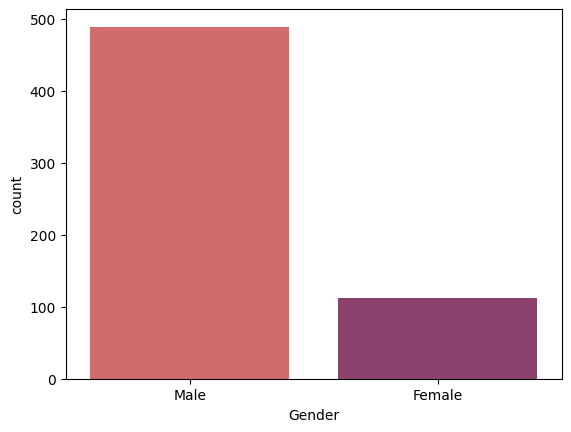

In [10]:
# "dropna" as False to count NaN (Not-a-Number) values
GenderAnalysis = loan_data.Gender.value_counts(dropna=False)
print(GenderAnalysis)

# Bar Charts Analysis "For Gender feature"
sns.countplot(x="Gender", data=loan_data, palette="flare")
plt.show()

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64


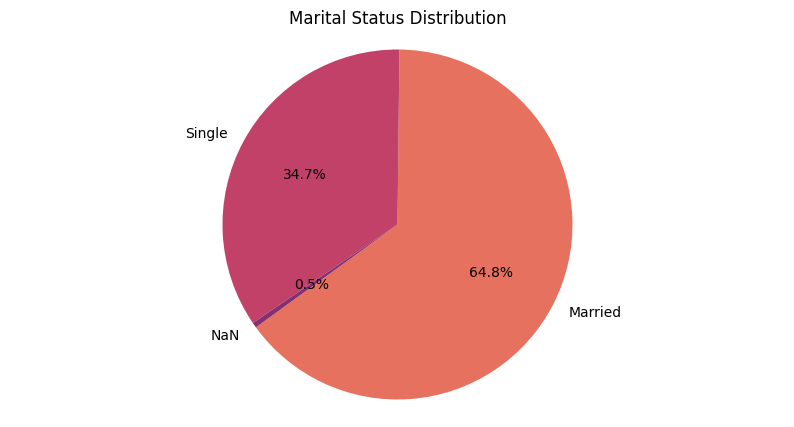

In [11]:
# "dropna" as False to count NaN values
MarriedAnalysis = loan_data.Married.value_counts(dropna=False)
print(MarriedAnalysis)

# Create a pie chart "For Married feature"
plt.figure(figsize=(10, 5)) # figure in inches

# labels by descending order
plt.pie(MarriedAnalysis,
        labels=[("Married"),("Single"),("NaN")],
        startangle=216,
        autopct='%1.1f%%',
        colors=sns.color_palette("flare",
        len(MarriedAnalysis)))

plt.axis('equal')  # Used to set the aspect ratio of the plot to be equal.
plt.title('Marital Status Distribution')
plt.show()

Dependents
0      345
1      102
2      101
3+      51
NaN     15
Name: count, dtype: int64


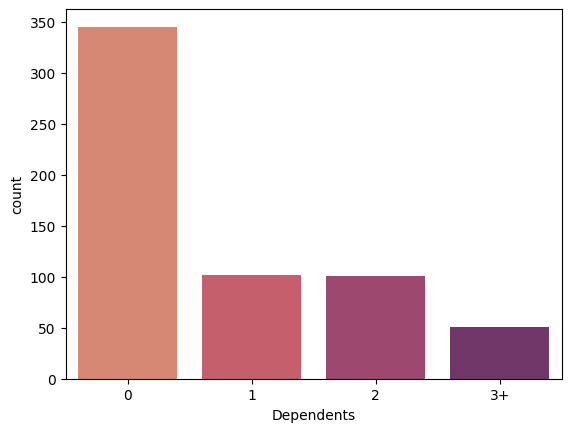

In [12]:
# "dropna" as False to count NaN values
DependentsAnalysis = loan_data.Dependents.value_counts(dropna=False)
print(DependentsAnalysis)

# Bar Charts Analysis "For Dependents feature"
sns.countplot(x="Dependents", data=loan_data, palette="flare")
plt.show()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


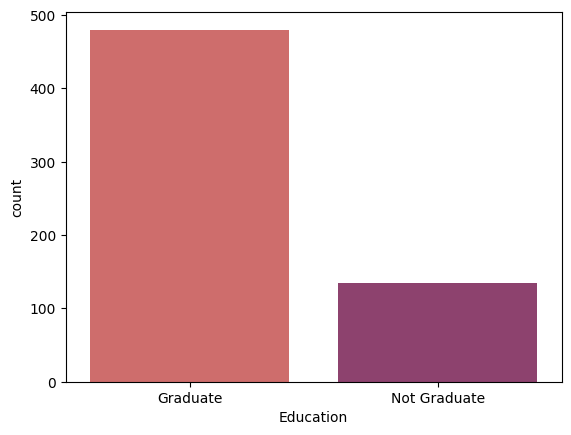

In [13]:
# "dropna" as False to count NaN values
EducationAnalysis = loan_data.Education.value_counts(dropna=False)
print(EducationAnalysis)

# Bar Charts Analysis "For Education feature"
sns.countplot(x="Education", data=loan_data, palette="flare")
plt.show()

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64


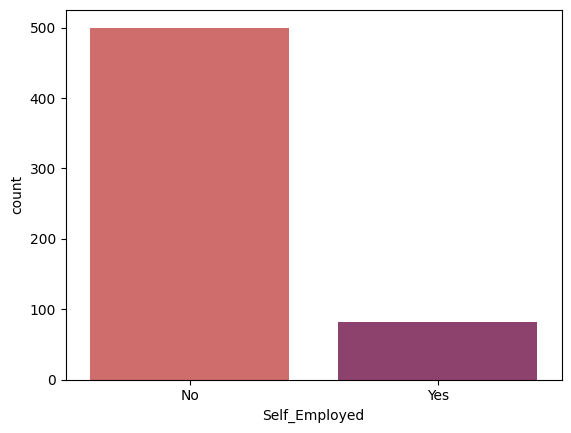

In [14]:
# "dropna" as False to count NaN values
Self_EmployedAnalysis = loan_data.Self_Employed.value_counts(dropna=False)
print(Self_EmployedAnalysis)

# Bar Charts Analysis "For Self Employed feature"
sns.countplot(x="Self_Employed", data=loan_data, palette="flare")
plt.show()

The Average Income: 5403.46 
The ratio of people with income above average to below average: 40.18 
Number of people income above the average: 176
Number of people income below the average: 438


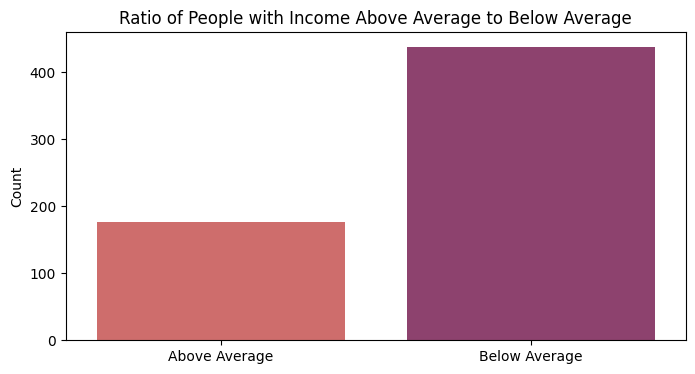

In [15]:
# Calculate the average income
average_income = loan_data['ApplicantIncome'].mean()
print(f"The Average Income: {average_income:.2f} ")

# Count incomes higher and lower than average
above_average_count = (loan_data['ApplicantIncome'] > average_income).sum()
below_average_count = (loan_data['ApplicantIncome'] <= average_income).sum()

# Calculate ratio and print the results
ratio = above_average_count / below_average_count
print(f"The ratio of people with income above average to below average: {ratio*100:.2f} ")
print(f"Number of people income above the average: {above_average_count}")
print(f"Number of people income below the average: {below_average_count}")

# Plot the ratio using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x=['Above Average', 'Below Average'], y=[above_average_count, below_average_count], palette="flare")
plt.title('Ratio of People with Income Above Average to Below Average')
plt.ylabel('Count')
plt.show()

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64


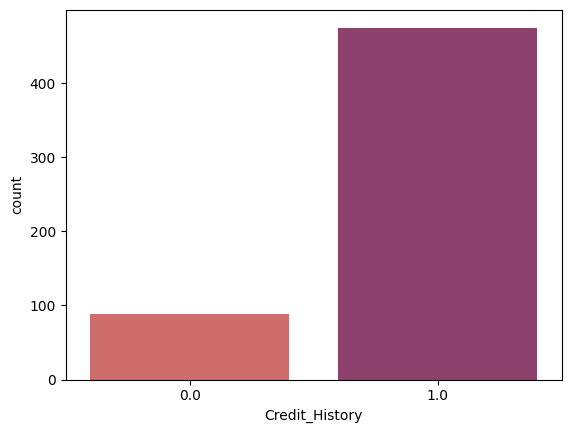

In [16]:
# "dropna" as False to count NaN values
Credit_HistoryAnalysis = loan_data.Credit_History.value_counts(dropna=False)
print(Credit_HistoryAnalysis)

# Bar Charts Analysis "For Credit History feature"
sns.countplot(x="Credit_History", data=loan_data, palette="flare")
plt.show()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


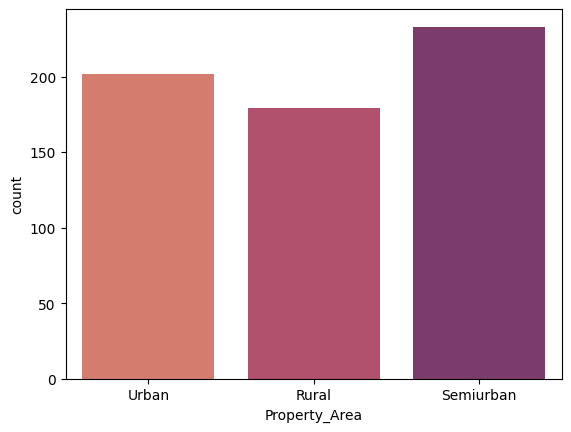

In [17]:
# "dropna" as False to count NaN values
Property_AreaAnalysis = loan_data.Property_Area.value_counts(dropna=False)
print(Property_AreaAnalysis)

# Bar Charts Analysis "For Property Area feature"
sns.countplot(x="Property_Area", data=loan_data, palette="flare")
plt.show()

Loan_Status
Y    422
N    192
Name: count, dtype: int64


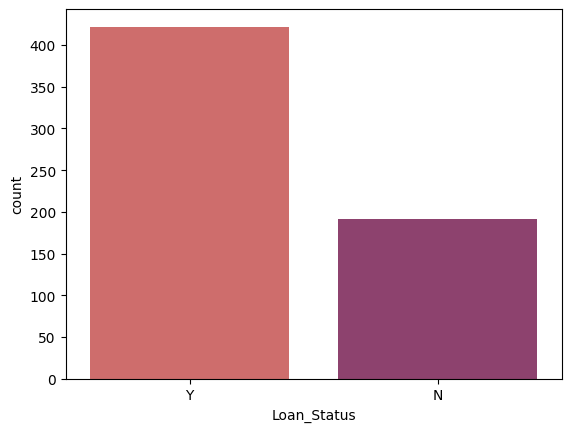

In [18]:
# "dropna" as False to count NaN values
Loan_StatusAnalysis = loan_data.Loan_Status.value_counts(dropna=False)
print(Loan_StatusAnalysis)

# Bar Charts Analysis "For Loan Status column"
sns.countplot(x="Loan_Status", data=loan_data, palette="flare")
plt.show()

The number of approved loans is higher compared to rejected loans. It also can be seen, there is **no missing values** in this column.

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


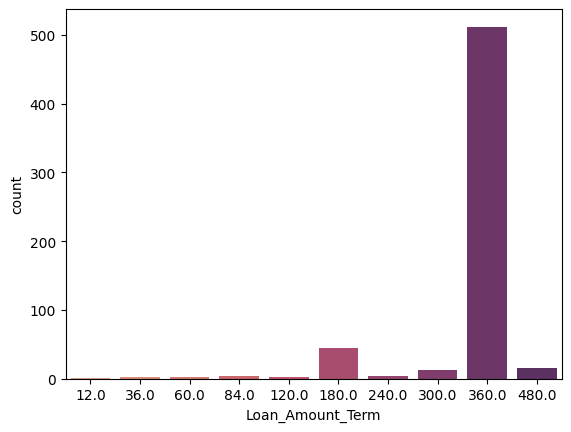

In [19]:
# "dropna" as False to count NaN values
Loan_Amount_TermAnalysis = loan_data.Loan_Amount_Term.value_counts(dropna=False)
print(Loan_Amount_TermAnalysis)

# Bar Charts Analysis "For Loan amount term feature"
sns.countplot(x="Loan_Amount_Term", data=loan_data, palette="flare")
plt.show()

As can be seen from the results, the **360** days loan duration is the most popular compared to others.

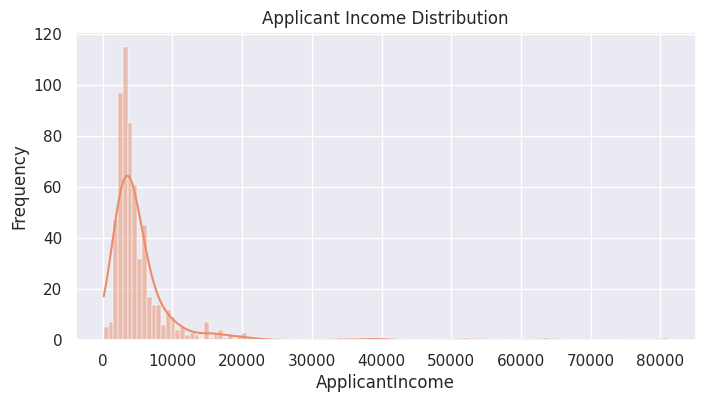

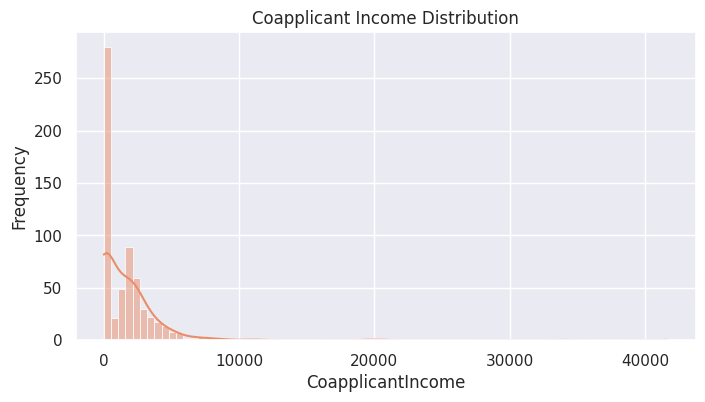

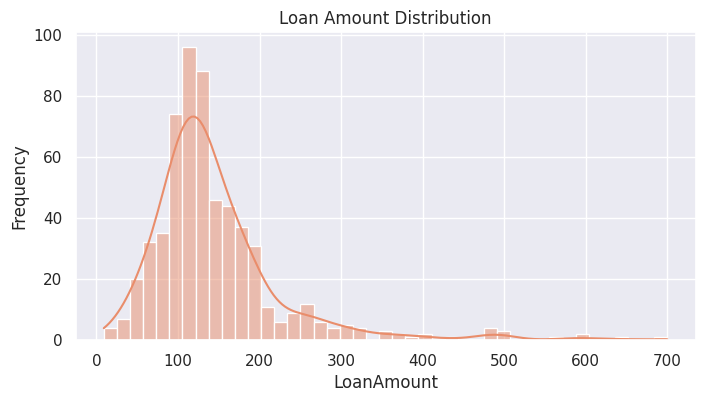

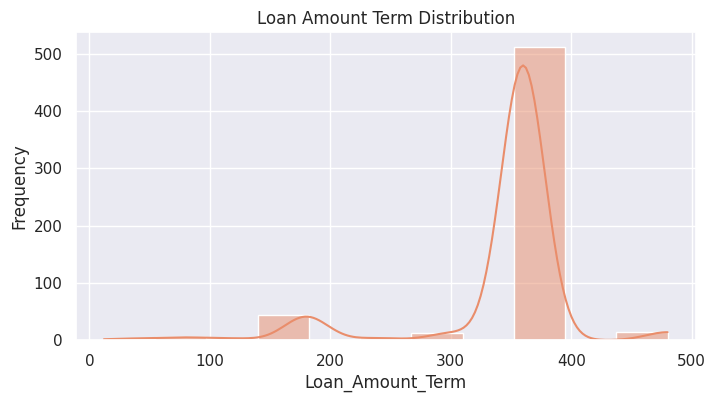

In [20]:
# Histogram distribution for numerical values "This enables us to see if there are outliers or not"

# Set the seaborn theme palette
sns.set_theme(palette="flare")

def plot_distribution(column, title):
    plt.figure(figsize=(8, 4))
    sns.histplot(data=loan_data, x=column, kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot distribution for each numerical column
plot_distribution("ApplicantIncome", "Applicant Income Distribution")
plot_distribution("CoapplicantIncome", "Coapplicant Income Distribution")
plot_distribution("LoanAmount", "Loan Amount Distribution")
plot_distribution("Loan_Amount_Term", "Loan Amount Term Distribution")

From this analysis we found the distribution of **Applicant income**, **Co Applicant Income**, and **Loan Amount** are *positively skewed* (which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer) and it has **outliers**. On the other hand, The distribution of **Loan Amount Term** is *negatively skewed* and it has **outliers**.

## <font size="4" face="WildWest">2. Correlation Analysis</font>

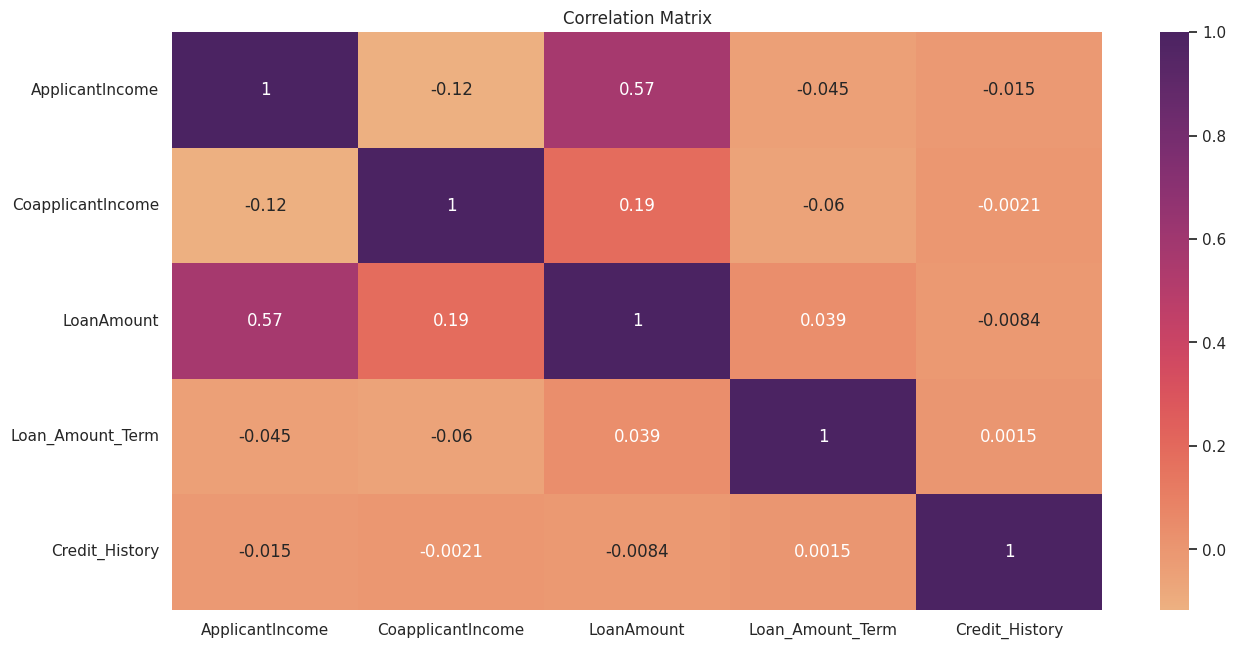

In [21]:
# Correlation matrix using heatmap
# Calculates the correlation coefficients between all pairs of numerical variables in the dataset
correlation_matrix = loan_data.corr(numeric_only=True)

# Create a heatmap figure with specified size (in inches)
plt.figure(figsize=(15, 7.5))

# Generate a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='flare') # annot: write the data value in each cell

# Add a title to the plot
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()

There is positive correlation between **Loan Amount** and **Applicant Income**

## <font size="4" face="WildWest">3. Data Relationships Analysis</font>

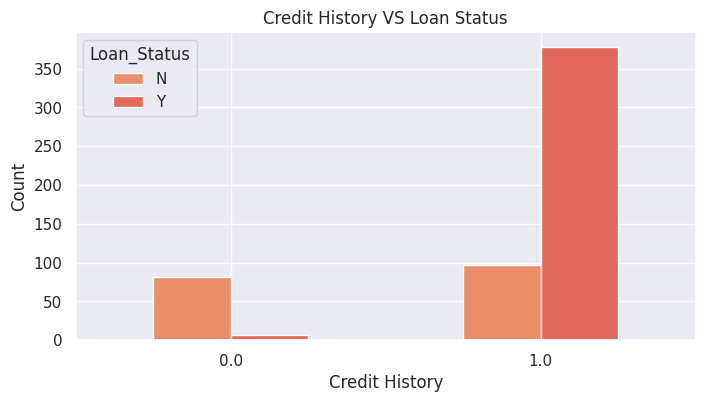

In [22]:
# Create a cross-tabulation of 'Credit History' and 'Loan status' variables
pd.crosstab(loan_data.Credit_History, loan_data.Loan_Status).plot(kind="bar", figsize=(8, 4))

# Add a title to the plot
plt.title('Credit History VS Loan Status')

# Label the x-axis
plt.xlabel('Credit History')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=0)

# Display the plot
plt.show()

The analysis appears a **good credit history** significantly *increases the chances of loan approval*. Because the percentage of people who have a good credit history and are approved is much better than a bad credit history.

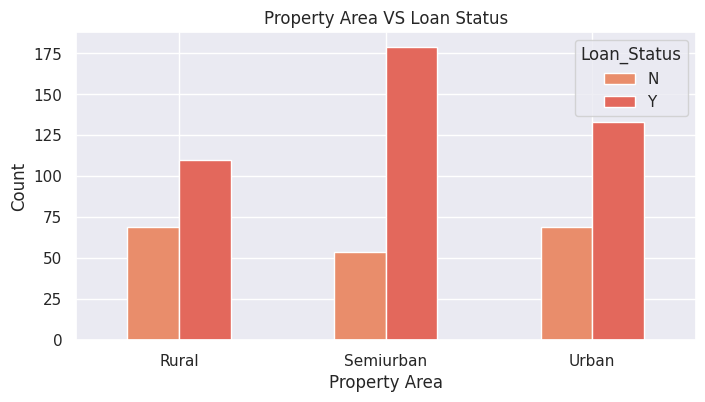

In [23]:
# Create a cross-tabulation of 'Property Area' and 'Loan Status' variables
pd.crosstab(loan_data.Property_Area, loan_data.Loan_Status).plot(kind="bar", figsize=(8, 4))

# Add a title to the plot
plt.title('Property Area VS Loan Status')

# Label the x-axis
plt.xlabel('Property Area')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=0)

# Display the plot
plt.show()

Most of loan that got accepted has property in **Semiurban** compared to *Urban* and *Rural*.

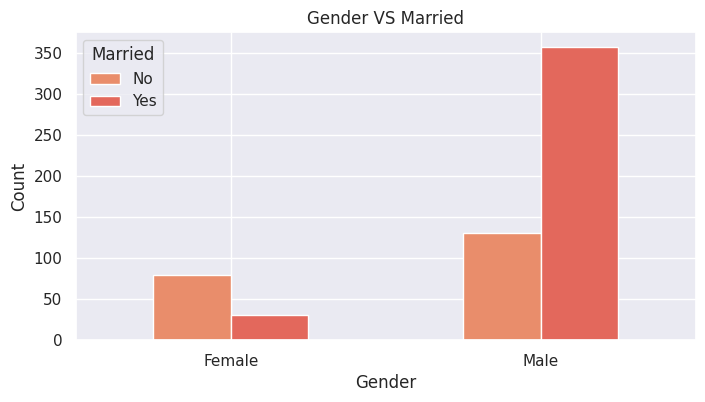

In [24]:
# Create a cross-tabulation of 'Gender' and 'Married' variables
pd.crosstab(loan_data.Gender, loan_data.Married).plot(kind="bar", figsize=(8, 4))

# Add a title to the plot
plt.title('Gender VS Married')

# Label the x-axis
plt.xlabel('Gender')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=0)

# Display the plot
plt.show()

Most **male applicants** are already **married** compared to **female applicants**. Also, the number of **not married male applicants** are **higher** compare to **female applicants** that had **not married**.

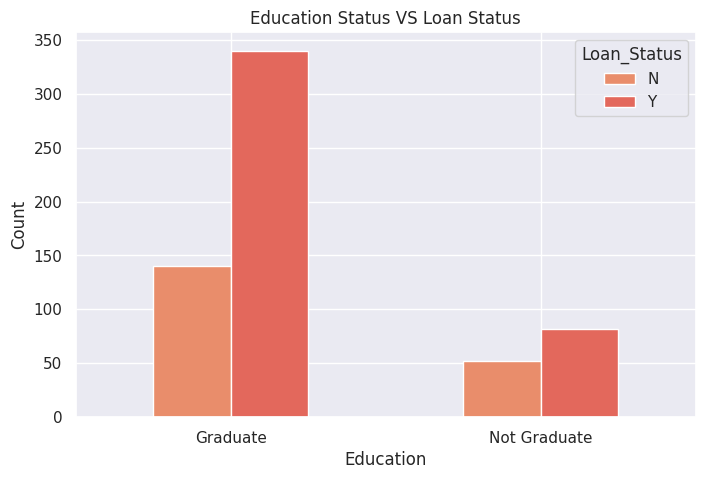

In [25]:
# Create a cross-tabulation of 'Gender' and 'Loan Status' variables
pd.crosstab(loan_data.Education, loan_data.Loan_Status).plot(kind="bar", figsize=(8, 5))

# Add a title to the plot
plt.title('Education Status VS Loan Status')

# Label the x-axis
plt.xlabel('Education')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=0)

# Display the plot
plt.show()

The analysis appears a **graduate applicant** significantly increases the chances of *loan approval*. Because the percentage of people who graduated and were approved is much better than who didn't graduate.

# <font color="#4863A0"> Data Cleaning 🧹</font>
Data cleaning refers to the process of **identifying**, **correcting**, and **removing errors**, **inconsistencies**, and **inaccuracies** from a dataset. It involves transforming raw data into a clean and structured format that is suitable for analysis, modeling, and other data-related tasks, including:
- Remove Unneeded Features
- Handling Missing Values
- Encoding Categorical Variables
- Handling Outliers
- Handling Duplicates

## <font size="4" face="WildWest">1. Remove Unneeded Features</font>
As Loan_ID is completely unique and not correlated with any of the other column, So we will drop it using .drop() function.
- axis = 1 means column , axis = 0 means row.
- inplace = True means the changes are reflected in the original DataFrame, inplace = False (default) means leaving the original DataFrame unchanged.

In [26]:
# Dropping Loan_ID column
loan_data.drop(['Loan_ID'], axis = 1 , inplace = True)

# Check the Loan_ID is dropped
print(loan_data.info())

# Check and ensure running
print(colored("The task has been completed without any errors....", "green", attrs=['reverse']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB
None
The task has been completed without any errors....


## <font size="4" face="WildWest">2. Handling Missing Values</font>

**Missing values** are data points that are absent or not recorded for certain variables in a dataset. This can happen because of mistakes such as data entry errors, equipment failures, or simply because the information is not available.

 **How to detect missing values?**
 - Look for blank cells and use data analysis tools that can identify missing values like .isnull() functoin.

 **Decision options:**
1. Keep them
    - Not ideal, as missing values can lead to biased analyses and inaccurate predictions.
2. Reassign new values to them (Using specific techniques)
    - Imputation (Y):
        - Replace missing values with estimated or calculated values based on the available data. This can be done using various methods such as:
            1. **Mean/Median Imputation:** Replace with the average (mean) or middle value (median) for numerical data.
            2. **Mode Imputation:** Replace with the most frequent value.
    - Forward/Backward Fill (N):
        - For time-series data, missing values can be filled with the last observed value (forward fill) or the next observed value (backward fill).
    - Interpolation (N):
        - Estimate missing values based on the trend or pattern observed in the existing data points.
3. Delete them (Sometimes necessary, especially if missing values are extensive and cannot be reasonably imputed without introducing significant bias.)

In [27]:
# Check for missing values
null_counts = loan_data.isnull().sum()

# Display the number of null values
print(null_counts)
print("_________________________________________________________________")
print(colored(f"Totally, there are {null_counts.sum()} null values in the dataset.", "green", attrs=['reverse']))

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
_________________________________________________________________
Totally, there are 149 null values in the dataset.


<font size="4" face="WildWest">There are two types of data:</font>
- Numerical Data
- Categorical Data

In [28]:
loan_data['Credit_History'].value_counts()

,count
Credit_History,
1.0,475
0.0,89


In [29]:
# Fill the missing values for numerical data, .fillna = fill (NaN) values
'''
## 1- Mean Imputation:
loan_data["Credit_History"] = loan_data["Credit_History"].fillna(loan_data["Credit_History"].mean())

## 1- Median Imputation:
loan_data["Credit_History"] = loan_data["Credit_History"].fillna(loan_data["Credit_History"].median())

## 2- Mode Imputatoin:
loan_data["Credit_History"] = loan_data["Credit_History"].fillna(loan_data["Credit_History"].mode()[0])

## 3- Forward Fill
loan_data["Credit_History"] = loan_data["Credit_History"].fillna(method='ffill')

## 3- Backward Fill
loan_data["Credit_History"] = loan_data["Credit_History"].fillna(method='bfill')

## 4- Interpolation
loan_data["Credit_History"] = loan_data["Credit_History"].interpolate(method='linear')
'''

loan_data["LoanAmount"] = loan_data["LoanAmount"].fillna(loan_data["LoanAmount"].mean())

loan_data["Loan_Amount_Term"] = loan_data["Loan_Amount_Term"].fillna(loan_data["Loan_Amount_Term"].median())

loan_data["Gender"] = loan_data["Gender"].fillna(loan_data["Gender"].mode()[0])
loan_data["Married"] = loan_data["Married"].fillna(loan_data["Married"].mode()[0])
loan_data["Dependents"] = loan_data["Dependents"].fillna(loan_data["Dependents"].mode()[0])
loan_data["Self_Employed"] = loan_data["Self_Employed"].fillna(loan_data["Self_Employed"].mode()[0])


loan_data.dropna(subset = ['Credit_History'], inplace = True)

In [30]:
# Check for missing values after handling
null_counts = loan_data.isnull().sum()

# Display the number of null values after handling
print(null_counts)
print("_________________________________________________________________")
print(colored(f"Totally, there are {null_counts.sum()} null values in the dataset.", "green", attrs=['reverse']))

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
_________________________________________________________________
Totally, there are 0 null values in the dataset.


## <font size="4" face="WildWest">3. Encoding Categorical Variables</font>

In [31]:
# Convert categorical variables into dummy/indicator variables through a process called "one-hot" encoding
loan_data = pd.get_dummies(loan_data)

# Drop unneeded features
loan_data = loan_data.drop(['Gender_Female',
                            'Married_No',
                            'Education_Not Graduate',
                            'Self_Employed_No',
                            'Loan_Status_N'], axis = 1) # axis = 1 for column

# Rename existing columns
newColunmsNames = {'Gender_Male': 'Gender',
                   'Married_Yes': 'Married',
                   'Education_Graduate': 'Education',
                   'Self_Employed_Yes': 'Self_Employed',
                   'Loan_Status_Y': 'Loan_Status'}

# Assigning new columns names
loan_data.rename(columns=newColunmsNames, inplace=True)

# Display the columns names and shape of the transformed dataset
## Get the column names of the DataFrame
column_names = loan_data.columns.tolist()

## Print the column names in a readable format
print(colored("Column Names:", "blue",attrs=['reverse']))

for col in column_names:
    print(f"- {col}")

print("The shape =",loan_data.shape)
print("_______________________________________________")

# Display the first 5 rows of the transformed target variable
print(colored("Transformed Target Variable (Y):","blue", attrs=['reverse']))
print(loan_data['Loan_Status'].head())  # First 5 rows by default

Column Names:
- ApplicantIncome
- CoapplicantIncome
- LoanAmount
- Loan_Amount_Term
- Credit_History
- Gender
- Married
- Dependents_0
- Dependents_1
- Dependents_2
- Dependents_3+
- Education
- Self_Employed
- Property_Area_Rural
- Property_Area_Semiurban
- Property_Area_Urban
- Loan_Status
The shape = (564, 17)
_______________________________________________
Transformed Target Variable (Y):
0     True
1    False
2     True
3     True
4     True
Name: Loan_Status, dtype: bool


##  <font size="4" face="WildWest">4. Removing Outliers</font>
Showing outliers in this process before making any handling, but in another graph than the previous graph I used.

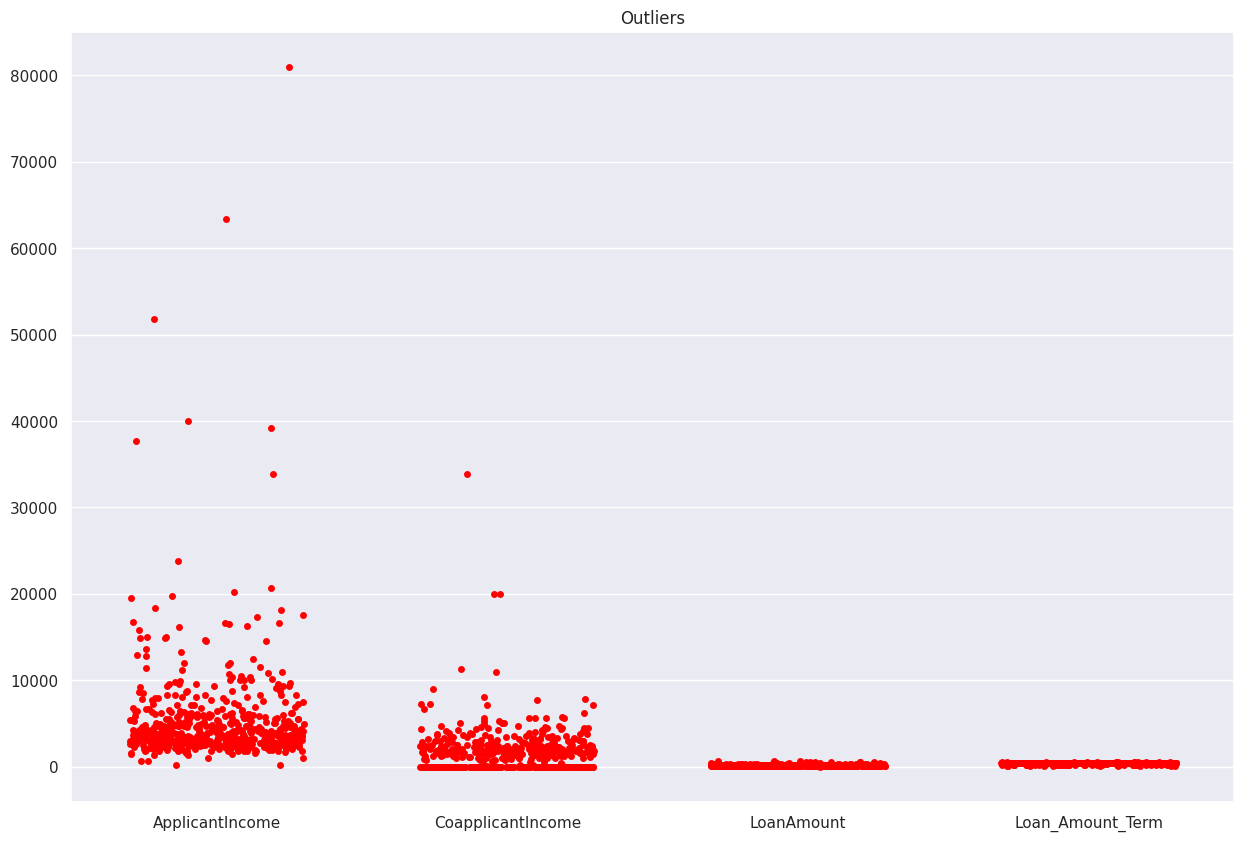

In [32]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Only variables that have outliers
outliersColumns = loan_data.get(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"])

# Add outliers to the plot
sns.stripplot(data=outliersColumns, color="red", jitter=0.3, size=5)

# Set the axis labels and title
plt.title("Outliers")

# Show the plot
plt.show()

In [33]:
# prompt: make new colum, NoCoapplicant = 1 if their Income equals 0
loan_data['NoCoapplicant'] = loan_data['CoapplicantIncome'].apply(lambda x: 1 if x == 0 else 0)
print(loan_data[['CoapplicantIncome', 'NoCoapplicant']].head())

   CoapplicantIncome  NoCoapplicant
0                0.0              1
1             1508.0              0
2                0.0              1
3             2358.0              0
4                0.0              1


**The Process**

In [34]:
# Reassign new values to them

'''
# 1- Capping Outliers
loan_data.loc[loan_data['ApplicantIncome'] > 20000, 'ApplicantIncome'] = 20000
loan_data.loc[loan_data['CoapplicantIncome'] > 10000, 'CoapplicantIncome'] = 10000
'''
'''
# 2- Robust Scaling
## Method 1

# import Robust Scaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
loan_data[['ApplicantIncome', 'CoapplicantIncome']] = scaler.fit_transform(loan_data[['ApplicantIncome', 'CoapplicantIncome']])

## Method 2

# IQR Scaling
Q1 = loan_data.quantile(0.25)
Q3 = loan_data.quantile(0.75)

# Calcuate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Removing Qutliers
loan_data = loan_data[~((loan_data < (Q1 - 1.5 * IQR)) |(loan_data > (Q3 + 1.5 * IQR))).any(axis=1)]

'''

'''
# 3- Replace with mean
loan_data.loc[loan_data['ApplicantIncome'] > 20000, 'ApplicantIncome'] = loan_data['ApplicantIncome'].mean()
loan_data.loc[loan_data['CoapplicantIncome'] > 10000, 'CoapplicantIncome'] = loan_data['CoapplicantIncome'].mean()
'''
'''
# Delete the outliers
# The data before deleting outliers
print("Before Removing the outliers", loan_data.shape)

# Deleting outliers (Removing the number of observation where the applicant income is more than 20k)
loan_data = loan_data[loan_data['ApplicantIncome']<20000]

# Deleting outliers (Removing the number of observation where the co-applicant income is more than 10k)
loan_data = loan_data[loan_data['CoapplicantIncome']<10000]

#The data after deleting outliers
print("After Removing the outliers", loan_data.shape)
'''

## Method 2
'''
# IQR Scaling
Q1 = loan_data.astype(np.float32).quantile(0.25)
Q3 = loan_data.astype(np.float32).quantile(0.75)
# Calcuate the Interquartile Range (IQR)
IQR = Q3 - Q1
'''

# loan_data = loan_data[~((loan_data < (Q1 - 1.5 * IQR)) |(loan_data > (Q3 + 1.5 * IQR)))]
# Removing Outliers only in numerical columns
for column in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    Q1 = loan_data[column].astype(np.float32).quantile(0.25)
    Q3 = loan_data[column].astype(np.float32).quantile(0.75)
    IQR = Q3 - Q1
    print(f"Column: {column}, Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    loan_data = loan_data[~((loan_data[column] < (Q1 - 1.5 * IQR)) | (loan_data[column] > (Q3 + 1.5 * IQR)))]

# printing shape
print(loan_data.shape)

# Check and ensure running
print(colored("The task has been completed without any errors....", "green", attrs=['reverse']))

Column: ApplicantIncome, Q1: 2892.75, Q3: 5803.75, IQR: 2911.0
Column: CoapplicantIncome, Q1: 0.0, Q3: 2306.0, IQR: 2306.0
Column: LoanAmount, Q1: 100.0, Q3: 155.0, IQR: 55.0
(479, 18)
The task has been completed without any errors....


In [35]:
loan_data['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,409
180.0,36
480.0,14
300.0,8
240.0,3
84.0,3
60.0,2
120.0,2
36.0,2


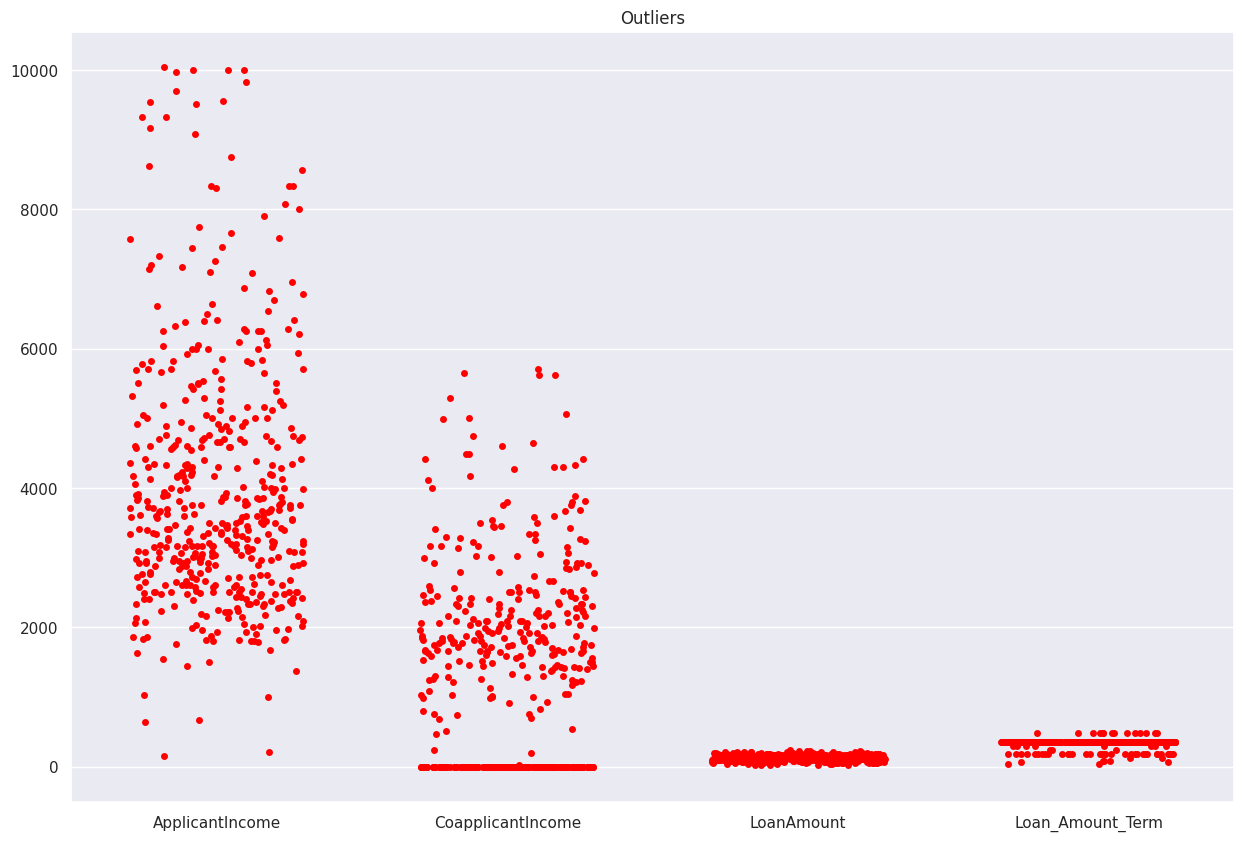

In [36]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Only variables that have outliers
outliersColumns = loan_data.get(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"])

# Add outliers to the plot
sns.stripplot(data=outliersColumns, color="red", jitter=0.3, size=5)

# Set the axis labels and title
plt.title("Outliers")

# Show the plot
plt.show()

In [37]:
loan_data['CoapplicantIncome'].value_counts()

,count
CoapplicantIncome,
0.0,205
2083.0,5
1666.0,5
2500.0,5
1459.0,3
...,...
1000.0,1
2792.0,1
4301.0,1


Another Graphe

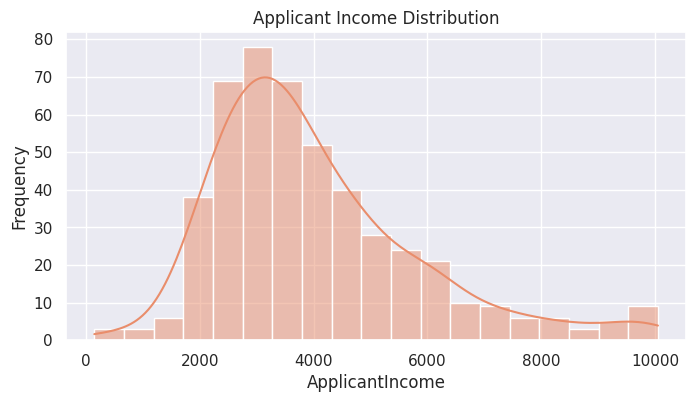

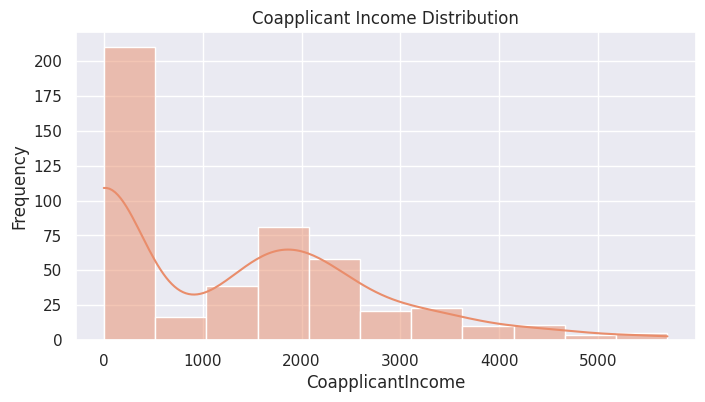

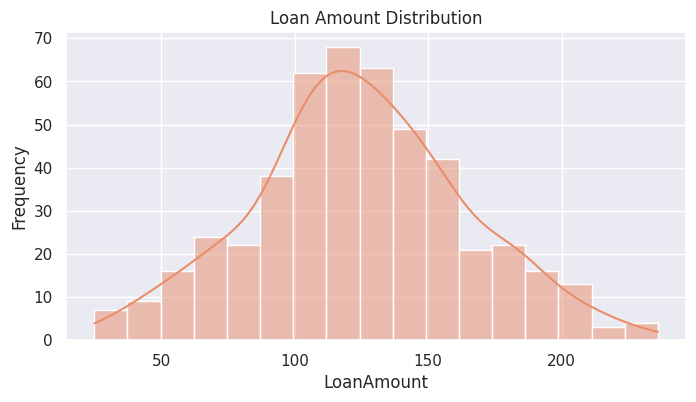

In [38]:
# Histogram distribution for numerical values

# Set the seaborn theme palette
sns.set_theme(palette="flare")

def plot_distribution(column, title):
    plt.figure(figsize=(8, 4))
    sns.histplot(data=loan_data, x=column, kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot distribution for each numerical column
plot_distribution("ApplicantIncome", "Applicant Income Distribution")
plot_distribution("CoapplicantIncome", "Coapplicant Income Distribution")
plot_distribution("LoanAmount", "Loan Amount Distribution")

As can be seen, the distribution after using log transformation are much better compared to original distribution.

## <font size="4" face="WildWest">5. Handling Duplicates</font>

In [39]:
# List of column names to check for duplicates (Numerical values)
columns_to_check = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Iterate over each column name
for column_name in columns_to_check:
    # Checking for duplicate entries in the current column
    duplicate_count = loan_data[column_name].duplicated().sum()

    # Output the result with a descriptive message
    if duplicate_count == 0:
        print(colored(f"No duplicate entries found in the {column_name} column.", "green", attrs=['reverse']))
    else:
        print(colored(f"Number of duplicate entries found in the {column_name} column: {duplicate_count}", "cyan", attrs=['bold']))

Number of duplicate entries found in the ApplicantIncome column: 77
Number of duplicate entries found in the CoapplicantIncome column: 246
Number of duplicate entries found in the LoanAmount column: 334
Number of duplicate entries found in the Loan_Amount_Term column: 470
Number of duplicate entries found in the Credit_History column: 477


**We don't need to handle duplicate values because it isn't affecting the accuracy or integrity of the analysis or model being performed.**

# <font color="#4863A0"> Data Preprocessing 👨‍💻</font>
It involves *preparing* and *transforming raw data* into a suitable format for analysis and **model training**. Effective data processing ensures that the machine learning algorithms can extract meaningful patterns and make accurate predictions, includes:
- Splitting data into "Features" - "Target"
- SMOTE Technique
- Data Re-scaling and Normalizing the features
- Splitting data into "Training" - "Testing" Data

## <font size="4" face="WildWest">1. Splitting data into "Features" - "Target"</font>

In [40]:
# Features "Inputs" (X)
X = loan_data.drop(columns=['Loan_Status'])

# Target variable "Outputs" (Y)
Y = loan_data['Loan_Status']

# Print the shapes of X and Y to verify the splitting
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (479, 17)
Shape of Y: (479,)


## <font size="4" face="WildWest">2. SMOTE Technique</font>
In previous exploration, it can be seen that the number between **accepted** and **rejected** loan is *imbalanced*. In this section, oversampling technique will be used to avoid overfitting. But recently I discovered that not using it will give higher accuracy.

## <font size="4" face="WildWest">3. Data Re-scaling and Normalizing the features</font>
***Min-Max Scaling:*** transforms the features so that they fall within a specified range, typically between 0 and 1.

***Standardization:*** the features so that they have a mean of 0 , typically between -1 and 1.

In [41]:
# Rescale and normalize the features
'''
# Standardization (Normalization)
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)
'''

# Min-Max Scaling (Rescaling)
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

import joblib
joblib.dump(min_max_scaler, 'standard_scaler.pkl')
#I will choose one of them in the future part "model selection" based on the highest accuracy

['standard_scaler.pkl']

**Why we use fit_transform() on training data but transform() on the test data?**
    
The fit_transform() method is used on training data to calculate scaling parameters like **mean** and **standard deviation**, then applies scaling. For test data, we apply the same scaling transformation without recalculating parameters, ensuring consistency for fair comparison and accurate evaluation.

## <font size="4" face="WildWest">4. Splitting data into "Training" - "Testing" Data</font>

In [42]:
# Split the data into training and testing sets
# X: Features, Y: Target variable
# test_size=0.2 specifies that 20% of the data will be used for testing and 80% for training
# random_state=0 sets the random seed for reproducibility
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Print the shapes of the training and testing sets to verify the splitting
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (383, 17)
Shape of X_test: (96, 17)
Shape of Y_train: (383,)
Shape of Y_test: (96,)


# <font color="#4863A0"> Model Selection 🧩</font>
Model selection is an essential step in machine learning that involves choosing **the most appropriate model for a given problem**. The goal of model selection is to find a model that generalizes well to unseen data and provides the best performance on the task at hand.
- Importing models for selection process
- Training our models.
    1. Decision Tree Classifier
    2. Random Forest Classifier (Highest Accuracy)
    3. Naives Bayes
        - GaussianNB (Suitable for continuous data)
        - BernoulliNB (Suitable for binary value)
    4. Logistic Regression
    5. Ridge Classifier CV
    6. K-Nearest Neighbors (KNN)
- For future searching
    7. Support Vector Classifier
    8. Gradient Boosting Classifier

## <font size="4" face="WildWest">1. Importing models for selection process</font>

In [43]:
from sklearn.tree import DecisionTreeClassifier  # For Decision Tree Classifier Model
from sklearn.ensemble import RandomForestClassifier # For Random Forest Classifier Model
from sklearn.neighbors import KNeighborsClassifier # For K-Nearest Neighbors Model
from sklearn.naive_bayes import GaussianNB,BernoulliNB  # For Gaussian,Bernoulli Naive Bayes Classifier Model
from sklearn.linear_model import RidgeClassifierCV, LogisticRegression # For Ridge Classifier Cross-validated and Logistic Regression Models
from sklearn.svm import SVC  # For Support Vector Classifier Model
from sklearn.ensemble import GradientBoostingClassifier  # For Gradient Boosting Classifier Model

from sklearn.model_selection import GridSearchCV

# Printing a success message in green color
print(colored("THE REQUIRED LIBRARIES WERE SUCCESSFULLY IMPORTED...", "green", attrs=['reverse']))

THE REQUIRED LIBRARIES WERE SUCCESSFULLY IMPORTED...


## <font face="WildWest">2. Hyper-Parameter Tuning for Machine Learning Models</font>

- Decision Tree Classifier

In [44]:
# Decision Tree Classifier Parameters
'''
sklearn.tree.DecisionTreeClassifier(*, criterion='gini',
                                    splitter='best', max_depth=None,
                                    min_samples_split=2, min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0, max_features=None,
                                    random_state=None, max_leaf_nodes=None,
                                    min_impurity_decrease=0.0, class_weight=None,
                                    ccp_alpha=0.0, monotonic_cst=None)
'''

# max_depth (The maximum depth of the tree)
# min_samples_split (The minimum number of samples required to split an internal node "2 by default")
# min_samples_leaf (The minimum number of samples required to be at a leaf node)
# max_features (The number of features to consider when looking for the best split)


# For each parameter, pick 3-5 most sane values for parameter tuning
max_depths = [3, 5, 10, 15]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 3, 5]
max_features = [2, 4, 6]

# Do GridSearch

# Initialize a Decision Tree Classifier model
Model1 = DecisionTreeClassifier()

# Define the parameter grid to search over
param_grid = {
    'max_depth': max_depths,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features
}

# Perform grid search
grid_search = GridSearchCV(Model1, param_grid, cv=4)
grid_search.fit(X_train, Y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

Model1 = grid_search.best_estimator_

DT_Accuracy_Train = Model1.score(X_train, Y_train)
DT_Accuracy_Test = Model1.score(X_test, Y_test)

# Print the best accuracies achieved
print(f"Decision Tree best accuracy (Training): {DT_Accuracy_Train*100:.2f}%")
print(f"Decision Tree best accuracy (Testing): {DT_Accuracy_Test*100:.2f}%")

# Print a success message indicating that the model has been trained successfully
print(colored("The Decision Tree model has been trained successfully","green", attrs=['reverse']))

{'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.8225054824561403
Decision Tree best accuracy (Training): 70.23%
Decision Tree best accuracy (Testing): 70.83%
The Decision Tree model has been trained successfully


- Random Forest Classifier

In [45]:
# Random Forest Classifier Parameters
'''
sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini',
                                        max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                        min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None,
                                        min_impurity_decrease=0.0, bootstrap=True, oob_score=False,
                                        n_jobs=None, random_state=None, verbose=0,
                                        warm_start=False, class_weight=None, ccp_alpha=0.0,
                                        max_samples=None, monotonic_cst=None)
'''

# n_estimators (The number of trees in the forest"عدد الاشجار في الغابة")
# max_depth (The maximum depth of the tree.)
# random_state (Controls both the randomness of the bootstrapping of the samples used when building trees)

# Initialize lists to store training and testing accuracies

param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 5, 10],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 3, 5],    # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider when looking for the best split
}

Model2 = RandomForestClassifier()

grid_search_rf = GridSearchCV(Model2, param_grid_rf, cv=4)
grid_search_rf.fit(X_train, Y_train)

print(grid_search_rf.best_params_)
print(grid_search_rf.best_score_)

Model2 = grid_search_rf.best_estimator_

# Find the maximum accuracy for both training and testing
RF_Accuracy_Train = Model2.score(X_train, Y_train)
RF_Accuracy_Test = Model2.score(X_test, Y_test)

# Print the best accuracies achieved
print(f"Random Forest best accuracy (Training): {RF_Accuracy_Train*100:.2f}%")
print(f"Random Forest best accuracy (Testing): {RF_Accuracy_Test*100:.2f}%")

# Print a success message indicating that the model has been trained successfully
print(colored("The Random Forest model has been trained successfully","green", attrs=['reverse']))

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
0.8277138157894737
Random Forest best accuracy (Training): 90.34%
Random Forest best accuracy (Testing): 83.33%
The Random Forest model has been trained successfully


In [46]:
# prompt: xgboost parameter selection
!pip install xgboost

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the XGBoost model
Model7 = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Define the parameter grid to search
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(estimator=Model7, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train, Y_train)

# Get the best parameters and best score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print(f"Best parameters for XGBoost: {best_params_xgb}")
print(f"Best cross-validation accuracy for XGBoost: {best_score_xgb*100:.2f}%")

# Train the XGBoost model with the best parameters on the full training data
Model7 = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', **best_params_xgb)
Model7.fit(X_train, Y_train)

XGBoost_Accuracy_Train = Model7.score(X_train, Y_train)
XGBoost_Accuracy_Test = Model7.score(X_test, Y_test)

print(f"XGBoost accuracy on the test set: {XGBoost_Accuracy_Test*100:.2f}%")
print(colored("The XGBoost model has been trained and tuned successfully", "green", attrs=['reverse']))


Best parameters for XGBoost: {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'reg_alpha': 0, 'reg_lambda': 1.5, 'subsample': 0.9}
Best cross-validation accuracy for XGBoost: 82.51%
XGBoost accuracy on the test set: 82.29%
The XGBoost model has been trained and tuned successfully


- Gaussian Naive Bayes

In [47]:
# Gaussian Naive Bayes Parameters
'''
sklearn.naive_bayes.GaussianNB(*, priors=None, var_smoothing=1e-09)
'''

# var_smoothing (Portion of the largest variance of all features that is added to variances for calculation stability.)

# Initialize lists to store training and testing accuracies
scoreListGNB_Train = []
scoreListGNB_Test = []

# Iterate over different values of var_smoothing
for i in range(1, 9):
    # Create a Gaussion Naive Bayes Model with the different values of var_smoothing
    Model3_1 = GaussianNB(var_smoothing=10**(-i))

    # Fit the model on the training data
    Model3_1.fit(X_train, Y_train)

    # Calculate and store the training accuracy
    scoreListGNB_Train.append(Model3_1.score(X_train, Y_train))

    # Calculate and store the testing accuracy
    scoreListGNB_Test.append(Model3_1.score(X_test, Y_test))

# Find the maximum accuracy for both training and testing
GNB_Accuracy_Train = max(scoreListGNB_Train)
GNB_Accuracy_Test = max(scoreListGNB_Test)

# Print the best accuracies achieved
print(f"Gaussian Naive Bayes best accuracy (Training): {GNB_Accuracy_Train*100:.2f}%")
print(f"Gaussian Naive Bayes best accuracy (Testing): {GNB_Accuracy_Test*100:.2f}%")

# Print a success message indicating that the model has been trained successfully
print(colored("The Gaussian Naive Bayes model has been trained successfully","green", attrs=['reverse']))

Gaussian Naive Bayes best accuracy (Training): 82.51%
Gaussian Naive Bayes best accuracy (Testing): 84.38%
The Gaussian Naive Bayes model has been trained successfully


- Bernoulli Naive Bayes

In [48]:
# Bernoulli Naive Bayes Parameters
'''
sklearn.naive_bayes.BernoulliNB(*, alpha=1.0, force_alpha=True, binarize=0.0, fit_prior=True, class_prior=None)
'''

# alpha (Additive (Laplace/Lidstone) smoothing parameter)
# force_alpha (If False and alpha is close to zero, it's adjusted to 1e-10 to prevent numerical errors; otherwise, alpha stays unchanged.)
# binarize (Sets the threshold for converting sample features to binary values; if None, assumes the input is already binary.)

# Create a Bernoulli Naive Bayes Model
Model3_2= BernoulliNB()

# Fit the model on the training data
Model3_2.fit(X_train, Y_train)

# Calculate and store the training accuracy
BNB_Accuracy_Train = Model3_2.score(X_train, Y_train)

# Calculate and store the testing accuracy
BNB_Accuracy_Test = Model3_2.score(X_test, Y_test)

# Print the best accuracies achieved
print(f"Bernoulli Naive Bayes best accuracy (Training): {BNB_Accuracy_Train*100:.2f}%")
print(f"Bernoulli Naive Bayes best accuracy (Testing): {BNB_Accuracy_Test*100:.2f}%")

# Print a success message indicating that the model has been trained successfully
print(colored("The Bernoulli Naive Bayes model has been trained successfully","green", attrs=['reverse']))

Bernoulli Naive Bayes best accuracy (Training): 82.25%
Bernoulli Naive Bayes best accuracy (Testing): 82.29%
The Bernoulli Naive Bayes model has been trained successfully


- Logistic Regression

In [49]:
# Logistic Regression Parameters
'''
sklearn.linear_model.LogisticRegression(penalty='l2', *,
                                        dual=False, tol=0.0001,
                                        C=1.0, fit_intercept=True,
                                        intercept_scaling=1, class_weight=None,
                                        random_state=None, solver='lbfgs',
                                        max_iter=100, multi_class='auto',
                                        verbose=0, warm_start=False,
                                        n_jobs=None, l1_ratio=None)
'''

'''
solver:
liblinear : small data
sag       : big data
sage      : big data

'''

# Suggested Parameter Grid for LogisticRegression tuning

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Inverse of regularization strength
    'penalty': ['l2', 'l1'],             # Specify the norm of the penalty (L1 or L2)
    'solver': ['liblinear', 'lbfgs']     # Algorithm to use in the optimization problem
}

Model4 = LogisticRegression()
grid_search_lr = GridSearchCV(estimator=Model4, param_grid=param_grid_lr, cv=4, scoring='accuracy')

# Fit the grid search on your training data
# X_train and Y_train should be your training features and labels
grid_search_lr.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best parameters for LogisticRegression:")
print(grid_search_lr.best_params_)
print("Best cross-validation accuracy for LogisticRegression:")
print(grid_search_lr.best_score_)

Model4 = grid_search_lr.best_estimator_

LR_Accuracy_Train = Model4.score(X_train, Y_train)
LR_Accuracy_Test = Model4.score(X_test, Y_test)

# Print the best accuracies achieved
print(f"Logistic Regression best accuracy (Training): {LR_Accuracy_Train*100:.2f}%")
print(f"Logistic Regression best accuracy (Testing): {LR_Accuracy_Test*100:.2f}%")

# Print a success message indicating that the model has been trained successfully
print(colored("The Logistic Regression model has been trained successfully","green", attrs=['reverse']))

Best parameters for LogisticRegression:
{'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation accuracy for LogisticRegression:
0.8225603070175439
Logistic Regression best accuracy (Training): 83.03%
Logistic Regression best accuracy (Testing): 85.42%
The Logistic Regression model has been trained successfully


- Ridge Classifier CV

In [50]:
# Ridge Classifier CV Parameters
'''
sklearn.linear_model.RidgeClassifierCV(alphas=(0.1, 1.0, 10.0), *,
                                       fit_intercept=True, scoring=None,
                                       cv=None, class_weight=None,
                                       store_cv_values=False)
'''
# alphas (Array of alpha values to try. Regularization strength)
# cv (Determines the cross-validation splitting strategy.)

# Create a Ridge Classifier Model
Model5= RidgeClassifierCV()

# Fit the model on the training data
Model5.fit(X_train,Y_train)

# Calculate and store the training accuracy
RCCV_Accuracy_Train = Model5.score(X_train, Y_train)

# Calculate and store the testing accuracy
RCCV_Accuracy_Test = Model5.score(X_test, Y_test)

# Print the best accuracies achieved
print(f"Ridge Classifier CV best accuracy (Training): {RCCV_Accuracy_Train*100:.2f}%")
print(f"Ridge Classifier CV best accuracy (Testing): {RCCV_Accuracy_Test*100:.2f}%")

# Print a success message indicating that the model has been trained successfully
print(colored("The Ridge Classifier CV model has been trained successfully","green", attrs=['reverse']))

Ridge Classifier CV best accuracy (Training): 82.25%
Ridge Classifier CV best accuracy (Testing): 84.38%
The Ridge Classifier CV model has been trained successfully


- K-Nearest Neighbors (KNN)

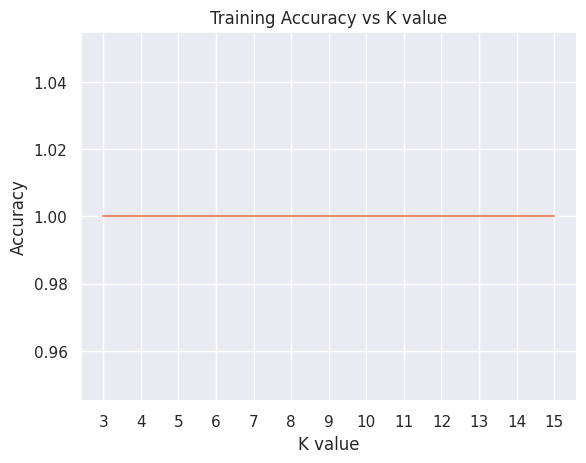

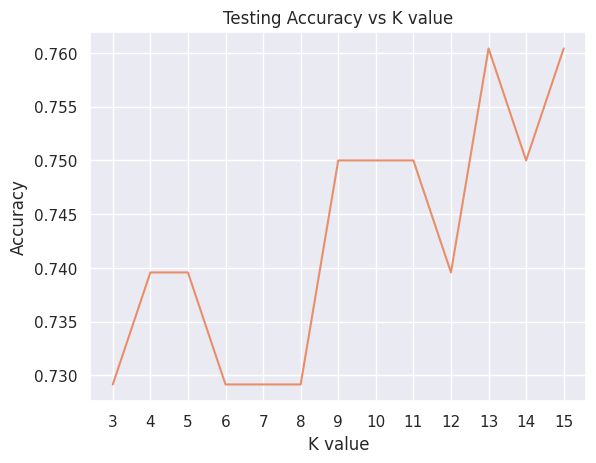

KNN best accuracy (Training): 100.00%
KNN best accuracy (Testing): 76.04%
The K-Nearest Neighbors (KNN) model has been trained successfully


In [51]:
# K-Nearest Neighbors (KNN) Parameters
'''
sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *,
                                       weights='uniform', algorithm='auto',
                                       leaf_size=30, p=2,
                                       metric='minkowski',
                                       metric_params=None, n_jobs=None)
'''

scoreListknn_Train = []
scoreListknn_Test = []

# Iterate over different values of n_neighbors
for i in range(3, 16):
    # Create a KNN model with the different value of n_neighbors
    Model6 = KNeighborsClassifier(n_neighbors=i, weights='distance')

    # Fit the model on the training data
    Model6.fit(X_train, Y_train)

    # Calculate and store the training accuracy
    scoreListknn_Train.append(Model6.score(X_train, Y_train))

    # Calculate and store the testing accuracy
    scoreListknn_Test.append(Model6.score(X_test, Y_test))

# Plot the training accuracy for different values of n_neighbors
plt.plot(range(3, 16), scoreListknn_Train)
plt.xticks(np.arange(3, 16, 1))
plt.title("Training Accuracy vs K value")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

# Plot the testing accuracy for different values of n_neighbors
plt.plot(range(3, 16), scoreListknn_Test)
plt.xticks(np.arange(3, 16, 1))
plt.title("Testing Accuracy vs K value")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

# Find the maximum accuracy for both training and testing
KNN_Accuracy_Train = max(scoreListknn_Train)
KNN_Accuracy_Test = max(scoreListknn_Test)

# Print the best accuracies achieved
print(f"KNN best accuracy (Training): {KNN_Accuracy_Train*100:.2f}%")
print(f"KNN best accuracy (Testing): {KNN_Accuracy_Test*100:.2f}%")

# Print a success message indicating that the model has been trained successfully
print(colored("The K-Nearest Neighbors (KNN) model has been trained successfully","green", attrs=['reverse']))

In [52]:
# Dictionary to store model names and their respective training scores (key:value)
model_train_scores = {
    "Model 1-Decision Tree Classifier": DT_Accuracy_Train,
    "Model 2-Random Forest Classifier": RF_Accuracy_Train,
    "Model 3-GaussianNB": GNB_Accuracy_Train,
    "Model 3-BernoulliNB": BNB_Accuracy_Train,
    "Model 4-Logistic Regression": LR_Accuracy_Train,
    "Model 5-Ridge Classifier CV": RCCV_Accuracy_Train,
    "Model 6-K-Nearest Neighbors (KNN)": KNN_Accuracy_Train,
    "Model 7-XGBoost": XGBoost_Accuracy_Train
}

# Loop through each model and print the training score
for model_name, accuracy in model_train_scores.items():
    print(colored(f"{model_name:<50} Training Score: {accuracy*100}", "green"))

Model 1-Decision Tree Classifier                   Training Score: 70.23498694516971
Model 2-Random Forest Classifier                   Training Score: 90.33942558746736
Model 3-GaussianNB                                 Training Score: 82.50652741514361
Model 3-BernoulliNB                                Training Score: 82.24543080939948
Model 4-Logistic Regression                        Training Score: 83.02872062663185
Model 5-Ridge Classifier CV                        Training Score: 82.24543080939948
Model 6-K-Nearest Neighbors (KNN)                  Training Score: 100.0
Model 7-XGBoost                                    Training Score: 87.98955613577023


## <font size="4" face="WildWest">2. Testing Score</font>

In [53]:
# Dictionary to store model names and their respective testing scores
model_test_scores = {
    "Model 1-Decision Tree Classifier": DT_Accuracy_Test,
    "Model 2-Random Forest Classifier": RF_Accuracy_Test,
    "Model 3-GaussianNB": GNB_Accuracy_Test,
    "Model 3-BernoulliNB": BNB_Accuracy_Test,
    "Model 4-Logistic Regression": LR_Accuracy_Test,
    "Model 5-Ridge Classifier CV": RCCV_Accuracy_Test,
    "Model 6-K-Nearest Neighbors (KNN)": KNN_Accuracy_Test,
    "Model 7-XGBoost": XGBoost_Accuracy_Test
}

# Loop through each model and print the testing score
for model_name, accuracy in model_test_scores.items():
    print(colored(f"{model_name:<50} Testing Score: {accuracy*100}", "green"))

Model 1-Decision Tree Classifier                   Testing Score: 70.83333333333334
Model 2-Random Forest Classifier                   Testing Score: 83.33333333333334
Model 3-GaussianNB                                 Testing Score: 84.375
Model 3-BernoulliNB                                Testing Score: 82.29166666666666
Model 4-Logistic Regression                        Testing Score: 85.41666666666666
Model 5-Ridge Classifier CV                        Testing Score: 84.375
Model 6-K-Nearest Neighbors (KNN)                  Testing Score: 76.04166666666666
Model 7-XGBoost                                    Testing Score: 82.29166666666666


## <font size="4" face="WildWest">3. Choosing the better Model.</font>

# <font color="#4863A0"> Model Deployment 🛠️</font>

In [54]:
import pickle
from google.colab import files

def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
        print(f"Model saved to {filename}")
        files.download(filename)

save_model(Model2, 'random_forest.pkl')
save_model(Model7, 'xgboost.pkl')
save_model(Model4, 'logistic_regression.pkl')
save_model(Model6, 'knn.pkl')

Model saved to random_forest.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model saved to xgboost.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model saved to logistic_regression.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model saved to knn.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('standard_scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>